### Author : Saurabh Rithe
### Task 2 : Prediction using Unsupervised Machine Learning¶
### The Spark Foundation - GRIP Jun2021

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

### Loading the iris dataset

In [2]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head() # See the first 5 rows

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
print(iris.target) # target values

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [4]:
# target names
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [5]:
iris_df.info() # Check for null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


### Finding the optimum number of clusters for k-means classification

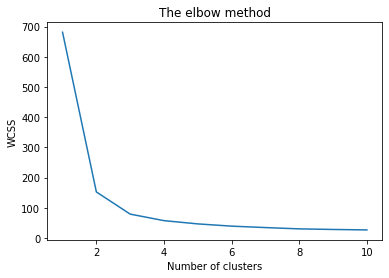

In [6]:
X = iris_df.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
l = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    l.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow point'
plt.plot(range(1, 11), l)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

### Creating the kmeans classifier, train the model

In [7]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3, max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

### Visualising the clusters

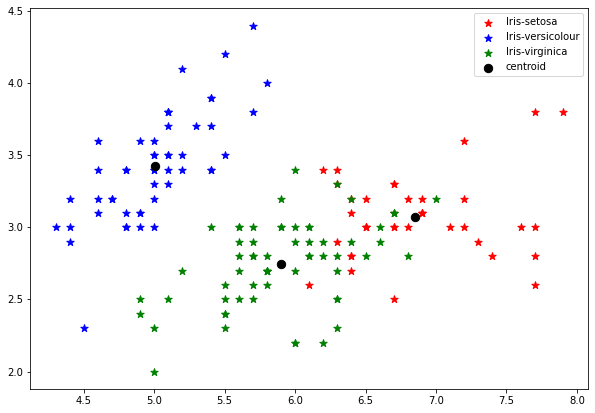

In [8]:
plt.figure(figsize = (10,7))

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 60, c = 'red', label = 'Iris-setosa', marker = "*")
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 60, c = 'blue', label = 'Iris-versicolour', marker = "*")
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 60, c = 'green', label = 'Iris-virginica', marker = "*")

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 70, c = 'black', label = 'centroid')

plt.legend()


In [9]:
# matching each learned cluster label with the true labels found in them
from scipy.stats import mode

labels = np.zeros_like(y_kmeans)
for i in range(3):
    mask = (y_kmeans == i)
    labels[mask] = mode(iris.target[mask])[0]

### Calculating accuracy of the model

In [10]:
from sklearn.metrics import accuracy_score
accuracy_score(iris.target, labels)

0.8933333333333333

### Calculating F1-score of the model

In [11]:
from sklearn.metrics import f1_score as F1

f1score = F1(labels, iris.target, average = 'weighted')
print(f1score)

0.8948917748917748


### Plotting confusion matrix

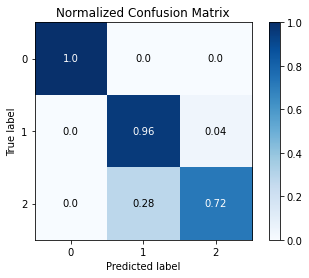

In [12]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(iris.target, labels, normalize=True)
plt.show()

### Classification report

In [13]:
from sklearn.metrics import classification_report as CR
print(CR(iris.target, labels))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.77      0.96      0.86        50
           2       0.95      0.72      0.82        50

    accuracy                           0.89       150
   macro avg       0.91      0.89      0.89       150
weighted avg       0.91      0.89      0.89       150

